# Notebook Structure

1. Import necessary dependencies
2. Create dataset
3. Create stacked bar chart with dual chart overtime


# 1. Import necessary dependencies

In [42]:
# libraries & dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

# 2. Create the dataset

In [43]:
# Data for the chart (in Trillions of US Dollars for LHS, Percentage for RHS)
data = {
    'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    'Direct Spend (Trillions)': [3.0, 3.5, 4.8, 5.2, 5.8, 6.5, 7.8, 9.5, 11.5, 14.0, 16.5, 19.0, 21.5],
    'Indirect Spend (Trillions)': [0.5, 0.7, 1.0, 1.2, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'Share of Leisure Spend (%)': [12.0, 14.0, 18.0, 19.0, 20.5, 22.0, 24.0, 26.5, 29.0, 32.0, 35.0, 38.0, 42.0]
}

In [44]:
# Create the Pandas DataFrame
df = pd.DataFrame(data)
df

,Year,Direct Spend (Trillions),Indirect Spend (Trillions),Share of Leisure Spend (%)
0,2018,3.0,0.5,12.0
1,2019,3.5,0.7,14.0
2,2020,4.8,1.0,18.0
3,2021,5.2,1.2,19.0
4,2022,5.8,1.5,20.5
5,2023,6.5,1.8,22.0
6,2024,7.8,2.0,24.0
7,2025,9.5,2.5,26.5
8,2026,11.5,3.0,29.0
9,2027,14.0,3.5,32.0


# 3. Create stacked bar chart with dual axis overtime

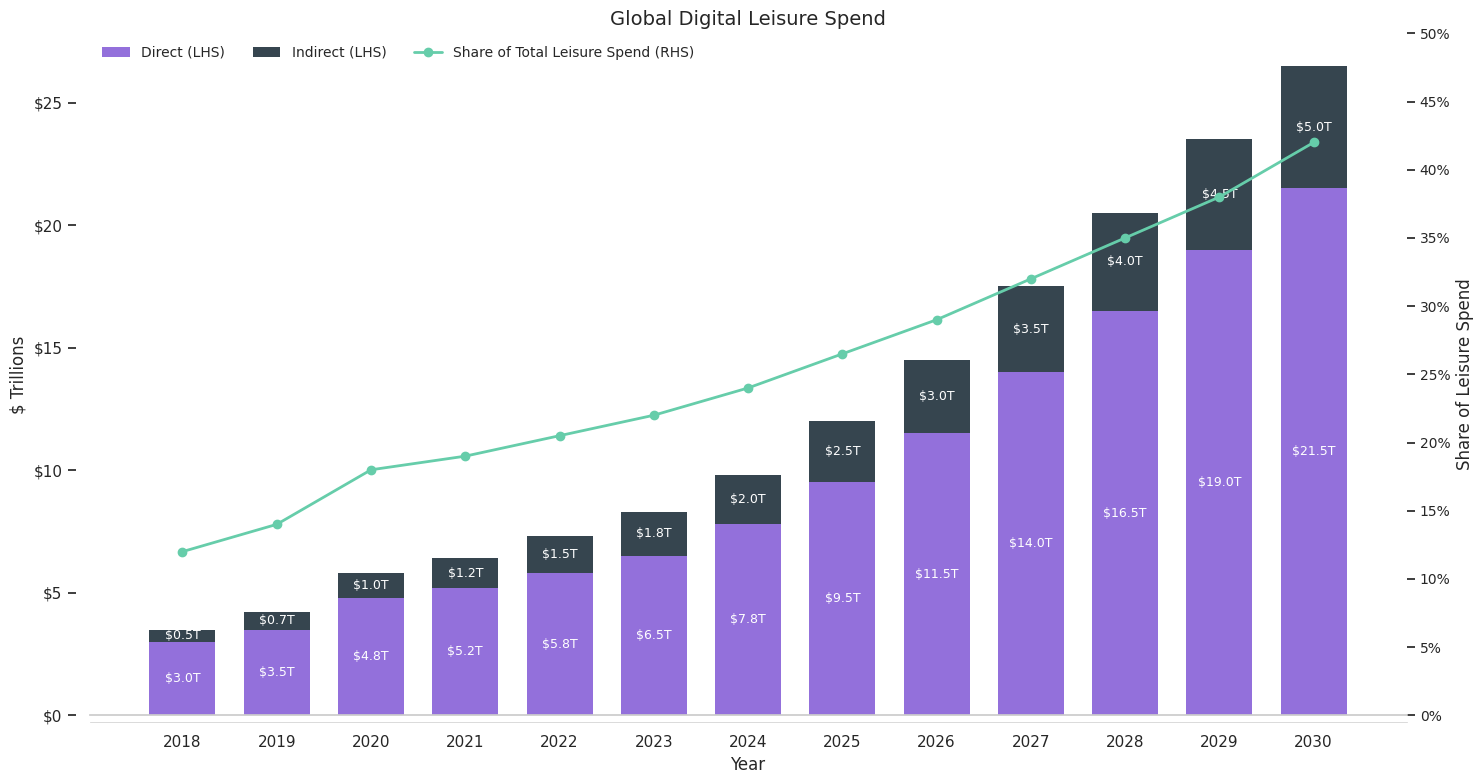

In [48]:
fig, ax1 = plt.subplots(figsize=(15, 8))

bar_width = 0.7

# Bar chart for Direct and Indirect Spend (left y-axis)
ax1.bar(df['Year'], df['Direct Spend (Trillions)'], color='#9370DB', label='Direct (LHS)', width=bar_width, linewidth=0)
ax1.bar(df['Year'], df['Indirect Spend (Trillions)'], bottom=df['Direct Spend (Trillions)'], color='#36454F', label='Indirect (LHS)', width=bar_width, linewidth=0)
ax1.set_ylabel('$ Trillions', fontsize=12)
ax1.set_yticks(np.arange(0, 26, 5))
ax1.set_yticklabels(['$0', '$5', '$10', '$15', '$20', '$25'], fontsize=10)
ax1.tick_params(axis='y')

# Add value labels inside the stacked bars
for i in range(len(df)):
    # Label for Direct Spend
    ax1.text(df['Year'][i], df['Direct Spend (Trillions)'][i] / 2,
             f"${df['Direct Spend (Trillions)'][i]:.1f}T",
             ha='center', va='center', color='white', fontsize=9)
    # Label for Indirect Spend
    ax1.text(df['Year'][i], df['Direct Spend (Trillions)'][i] + df['Indirect Spend (Trillions)'][i] / 2,
             f"${df['Indirect Spend (Trillions)'][i]:.1f}T",
             ha='center', va='center', color='white', fontsize=9)

# Create a second y-axis for the share of total leisure spend (right y-axis)
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Share of Leisure Spend (%)'], color='#66CDAA', linewidth=2, marker='o', label='Share of Total Leisure Spend (RHS)')
ax2.set_ylabel('Share of Leisure Spend', fontsize=12)
ax2.set_yticks(np.arange(0, 55, 5))
ax2.set_yticklabels([f'{i}%' for i in range(0, 55, 5)], fontsize=10)
ax2.tick_params(axis='y')

# Set x-axis ticks and labels
ax1.set_xlabel('Year', fontsize=12)
ax1.set_xticks(df['Year'])
# ax1.set_xticklabels([str(year)[2:] if year != df['Year'][0] else str(year) for year in df['Year']], fontsize=10)

# Set title
plt.title('Global Digital Leisure Spend', fontsize=14)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, frameon=False, ncol=3)

# Remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 5))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.grid(visible=None)
ax2.grid(visible=None)

# Adjust layout
plt.tight_layout()
plt.show()